In [49]:
import pandas as pd
import sqlite3
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
from scipy.stats import binom

In [2]:
conn = sqlite3.connect('ca3.db')

In [3]:
def importa_file_csv(cartella, dataframe_titles, database):
    # connection with sqlite
    conn = sqlite3.connect(database)

    # Get all files in the folder
    file_cartella = os.listdir(cartella)

    # loop in folder
    for file in file_cartella:
        if file.endswith(".csv"):
            # get the tile from dictionary
            title = dataframe_titles.get(file)
            if title:
                # read csv in dataframe
                path_file = os.path.join(cartella, file)
                dataframe = pd.read_csv(path_file)

                # create tables in sqlite based on dataframe
                dataframe.to_sql(title, conn, if_exists='replace', index=False)

   
    
    



In [17]:
# specify where files are stored
folder_with_files = "ca2"

# dictionary with filenames and dataframe_titles
dataframe_titles = {
    'tipsho20_linear.csv': 'housing_price',
    'sts_copi_a_linear.csv': 'cost',
    'tipsna50_linear.csv': 'investment',
    'sdg_10_20_linear.csv': 'pro_capita_income',
    'sts_cobp_a$defaultview_linear.csv': 'res_buiding_permits',
    'nama_10_pe_linear.csv': 'population',
    'all_countries.csv':'countries'
}

# name database SQLite
database = "ca3.db"

# call the function to import files in sqlite
importa_file_csv(folder_with_files, dataframe_titles, database)


In [19]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   geo                                 584 non-null    object 
 1   TIME_PERIOD                         584 non-null    int64  
 2   housing_price                       584 non-null    float64
 3   Output price index in construction  566 non-null    float64
 4   investment in costruction           584 non-null    float64
 5   pro_capita__income                  517 non-null    float64
 6   res_buiding_permits                 243 non-null    float64
 7   population                          584 non-null    float64
 8   alpha-3                             561 non-null    object 
 9   sub-region                          561 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 50.2+ KB


In [20]:
final['geo'].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI',
       'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK'], dtype=object)

In [29]:
mean_Y = final['pro_capita__income'].mean()

# creating a binomial column that will store the valu Y if the pro capita income is above the average and N if otherwise
final['pro_capita__income_cat'] = final['pro_capita__income'].apply(lambda x: 'Y' if x > mean_Y else x)

In [21]:
final.describe()

,TIME_PERIOD,housing_price,Output price index in construction,investment in costruction,pro_capita__income,res_buiding_permits,population
count,584.000000,584.000000,566.000000,584.000000,517.000000,243.000000,584.000000
mean,2011.546233,103.217449,97.759541,4.494007,17799.309478,7.002881,16495.969914
std,6.450332,30.661723,17.875076,2.097262,5729.974292,9.792713,21862.036057
min,2000.000000,29.330000,43.000000,0.600000,4051.000000,0.300000,389.960000
25%,2006.000000,87.452500,88.425000,2.800000,13987.000000,1.150000,3363.435000
50%,2012.000000,100.685000,98.900000,4.200000,17576.000000,3.500000,8351.275000
75%,2017.000000,118.602500,105.000000,5.700000,21641.000000,8.350000,16071.750000
max,2022.000000,253.580000,199.300000,13.500000,36319.000000,41.900000,83797.000000


In [30]:
final.head()

,geo,TIME_PERIOD,housing_price,Output price index in construction,investment in costruction,pro_capita__income,res_buiding_permits,population,alpha-3,sub-region,pro_capita__income_cat
0,AT,2000,60.36,69.4,5.3,18096.0,NaN,8011.57,AUT,Western Europe,Y
1,AT,2001,60.82,70.5,4.9,18038.0,NaN,8042.29,AUT,Western Europe,Y
2,AT,2002,61.21,71.4,4.6,18604.0,NaN,8082.12,AUT,Western Europe,Y
3,AT,2003,61.36,72.4,4.4,19575.0,NaN,8118.25,AUT,Western Europe,Y
4,AT,2004,60.21,74.4,4.4,20217.0,NaN,8169.44,AUT,Western Europe,Y


# Description of variables

In [23]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings 
warnings.filterwarnings('ignore')

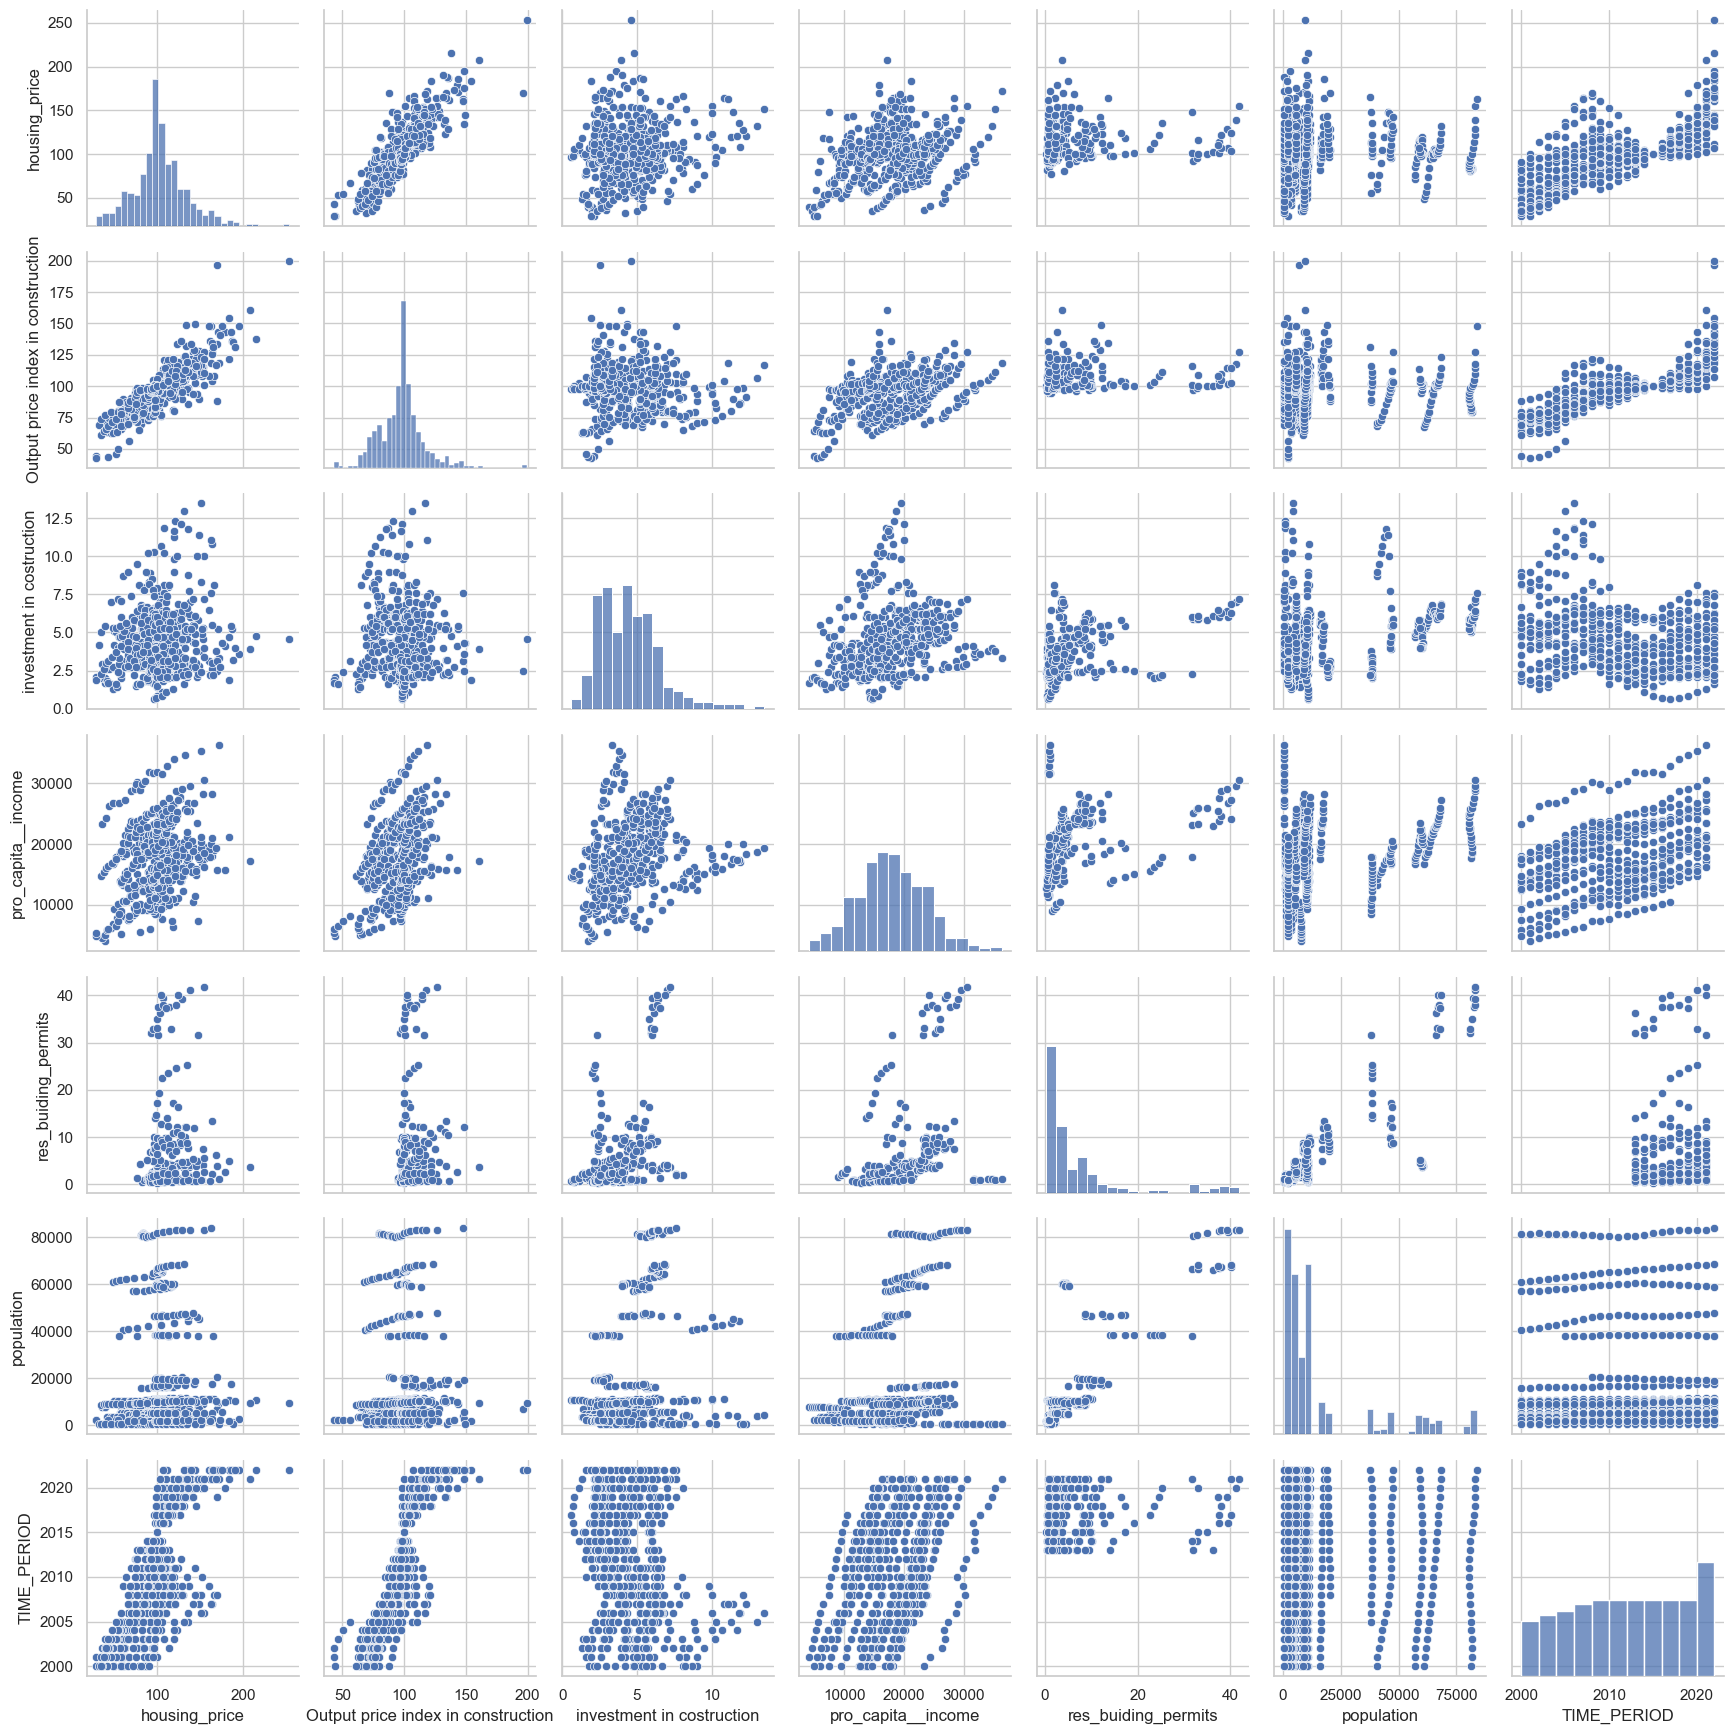

In [24]:
# Create plots to study the variables
sns.set(style='whitegrid', context='notebook')
# declare the columns for the plot
cols = ['housing_price', 'Output price index in construction', 'investment in costruction', 'pro_capita__income', 
        'res_buiding_permits','population','TIME_PERIOD']
# Display the pairplot 
sns.pairplot(final[cols], height = 2.5)
plt.tight_layout()
plt.show()

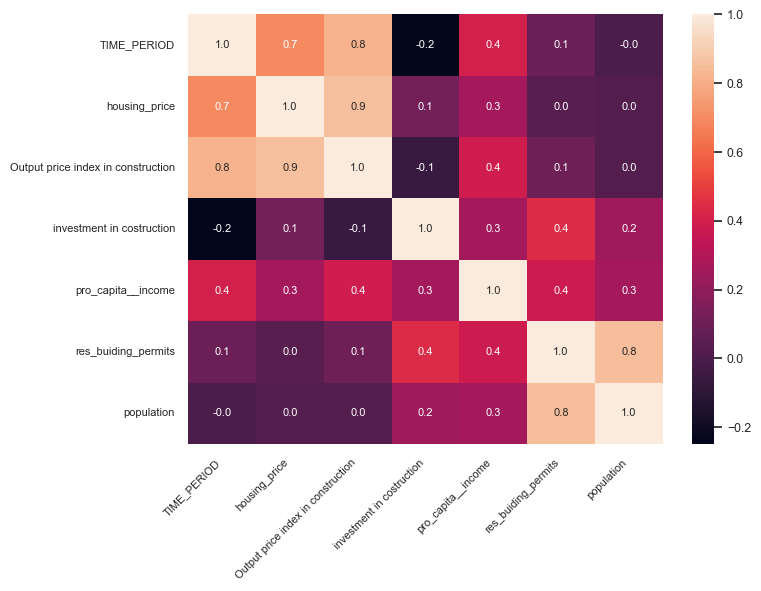

In [27]:
cm = final.corr()

# Configurazione del plot
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot del heatmap con tutti i valori
sns.heatmap(cm, annot=True, fmt='.1f', annot_kws={'size': 8}, ax=ax)

# Personalizzazione delle etichette
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=8)

# Mostra il plot
plt.tight_layout()
plt.show()

In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   geo                                 584 non-null    object 
 1   TIME_PERIOD                         584 non-null    int64  
 2   housing_price                       584 non-null    float64
 3   Output price index in construction  566 non-null    float64
 4   investment in costruction           584 non-null    float64
 5   pro_capita__income                  517 non-null    float64
 6   res_buiding_permits                 243 non-null    float64
 7   population                          584 non-null    float64
 8   alpha-3                             561 non-null    object 
 9   sub-region                          561 non-null    object 
 10  pro_capita__income_cat              517 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usa

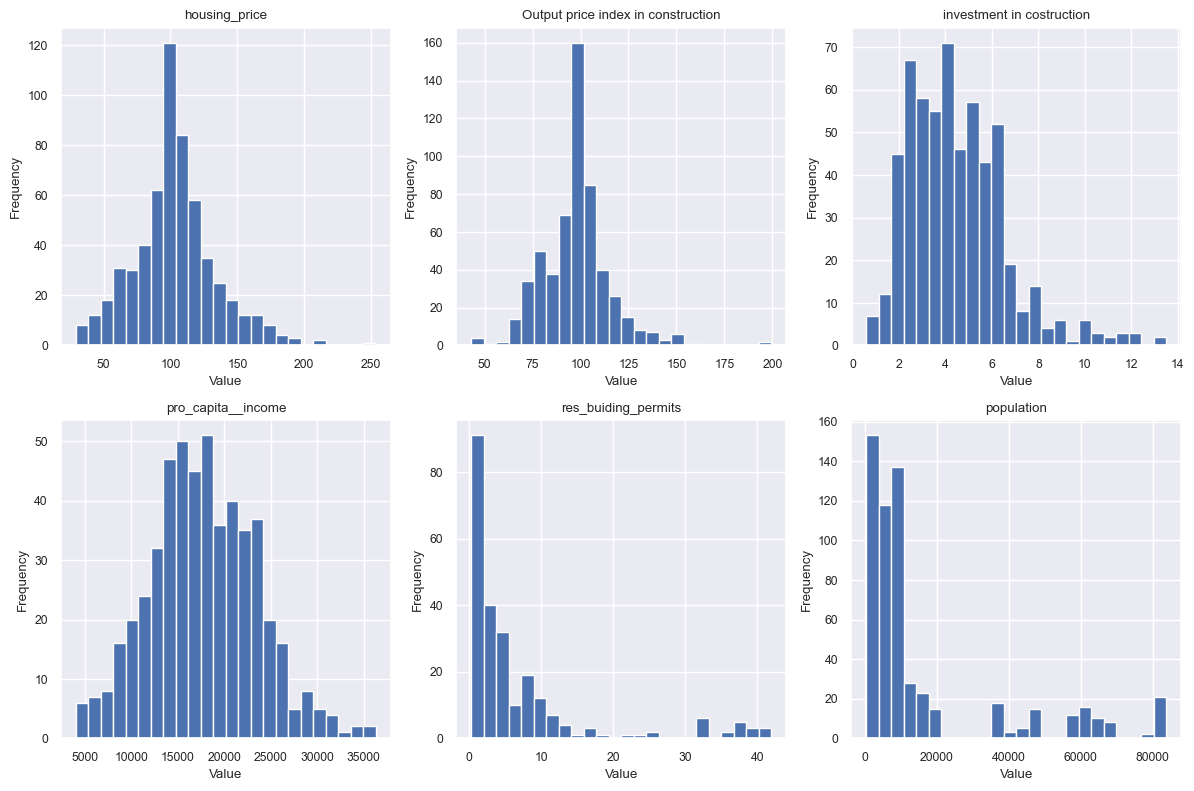

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Variabili da plottare
variables = ['housing_price', 'Output price index in construction', 'investment in costruction',
             'pro_capita__income', 'res_buiding_permits', 'population']

# Iterazione sui subplots e creazione degli istogrammi
for i, ax in enumerate(axs.flat):
    if i < len(variables):
        variable = variables[i]
        ax.hist(final[variable].dropna(), bins=24)
        ax.set_title(variable)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

# Riduzione dello spazio tra i subplots
plt.tight_layout()

# Visualizzazione dei plot
plt.show()

In [45]:
Y = (final['pro_capita__income_cat'] == 'Y').sum()
Y


252

In [47]:
n=final['pro_capita__income_cat'].count()
n

517

In [53]:
p = Y/n
p

0.4874274661508704

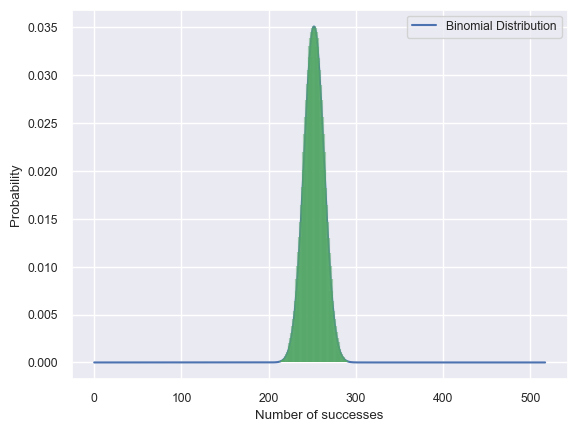

In [52]:
# calculate binomial values
binom_v = np.arange(0, n+1)
probability = binom.pmf(binom_v, n, p)

# plot the binomial distribution
plt.plot(binom_v, probability, ms=8, label='Binomial Distribution')
plt.vlines(binom_v, 0, probability, colors='g', lw=3, alpha=0.5)


# legend
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.legend()


plt.show()


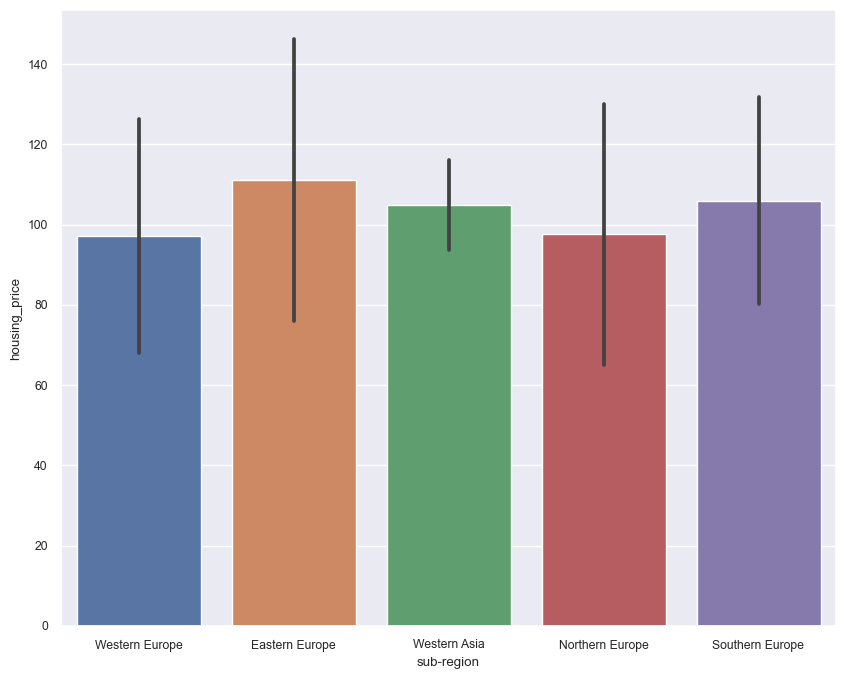

In [58]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="sub-region", y="housing_price", data=final, ci="sd")

In [56]:
asia = final[final['sub-region']=='Western Asia']

In [57]:
asia['geo'].unique()

array(['CY'], dtype=object)

In [63]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   geo                                 478 non-null    object 
 1   TIME_PERIOD                         478 non-null    int64  
 2   housing_price                       478 non-null    float64
 3   Output price index in construction  478 non-null    float64
 4   investment in costruction           478 non-null    float64
 5   pro_capita__income                  478 non-null    float64
 6   population                          478 non-null    float64
 7   alpha-3                             478 non-null    object 
 8   sub-region                          478 non-null    object 
 9   pro_capita__income_cat              478 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 41.1+ KB


In [60]:
final.drop(columns='res_buiding_permits', inplace = True)

In [62]:
final.dropna(inplace=True)

In [86]:
#create dataframe with only numerical variables for normalization
final_normalized= final.drop(columns=['geo','alpha-3','sub-region','pro_capita__income_cat'])

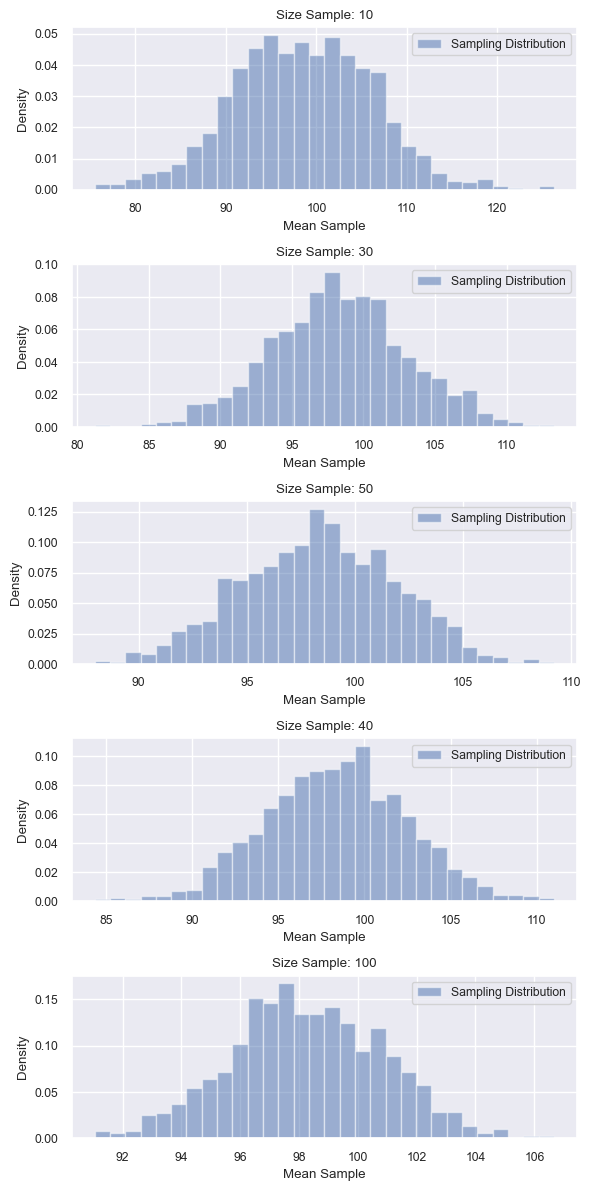

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random sample from variable
index_housing = final['housing_price']
tot_obs = 478
sub_sample = np.random.choice(index_housing, size=tot_obs, replace=True)

# calculate mean sample
size_samples = [10, 30, 50, 40, 100]
mean_s = []

for n in size_samples:
    means = []
    for _ in range(1000):
        sample_n = np.random.choice(sub_sample, size=n, replace=True)
        mean_one = np.mean(sample_n)
        means.append(mean_one)
    mean_s.append(means)

# Plot of the sampling distribution
fig, axs = plt.subplots(len(size_samples), 1, figsize=(6, 12))

for i, n in enumerate(size_samples):
    axs[i].hist(mean_s[i], bins=30, density=True, alpha=0.5, label='Sampling Distribution')
    axs[i].set_title(f'Size Sample: {n}')
    axs[i].set_xlabel('Mean Sample')
    axs[i].set_ylabel('Density')
    axs[i].legend()


plt.tight_layout()
plt.show()


In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final_normalized = scaler.fit_transform(final_normalized)
